In [2]:
from astropy import units as u
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn import datasets
import numpy.ma as ma

### Current SQL Query

In [ ]:
# select top 10000 l.specObjID, s.z, e.sfr_tot_p50, e.oh_p50, 
# l.h_beta_flux, l.oii_3726_flux, l.oii_3729_flux, l.oiii_4959_flux, 
# l.oiii_4363_flux, l.oiii_5007_flux, l.nii_6548_flux, l.nii_6584_flux,  
# l.sii_6717_flux, l.sii_6731_flux, l.oii_flux, l.oiii_flux,
# l.h_alpha_flux, e.bptclass, e.lgm_tot_p50, e.specsfr_tot_p50


# from galSpecLine as l JOIN galSpecExtra as e on e.specObjID = l.specObjID 
# JOIN specObj as s on e.specObjID = s.specObjID

# WHERE s.CLASS = 'GALAXY'
# AND e.sfr_tot_p50 > -9000
# AND e.lgm_tot_p50 > -9000
# AND e.specsfr_tot_p50 > -9000

# ORDER BY newid()


# SFR BPT

In [783]:
data = pd.read_csv("/Users/kyleporter/Desktop/ASTR480/Final_Data/OH_SFR_BPT_1000.csv", header=1)
data

,oh_p50,sfr_tot_p50,bptclass
0,-9999.000000,-2.040528,-1
1,-9999.000000,-9999.000000,-1
2,-9999.000000,-0.619822,1
3,-9999.000000,-4.320364,-1
4,-9999.000000,-0.135347,3
5,-9999.000000,-9999.000000,-1
6,-9999.000000,-1.728022,-1
7,-9999.000000,-9999.000000,-1
8,-9999.000000,0.143602,2
9,-9999.000000,-9999.000000,2


Text(0,0.5,'SFR')

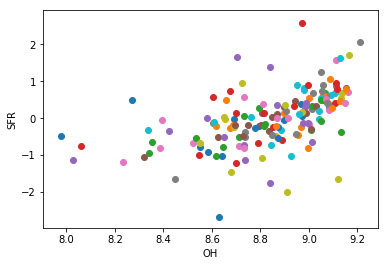

In [79]:
fig, ax = plt.subplots()
for i in data.values:
    if((i[0] != -9999) & (i[1] != -9999)):
        ax.scatter(i[0], i[1])
ax.set_xlabel("OH")
ax.set_ylabel("SFR")


(-4, 5)

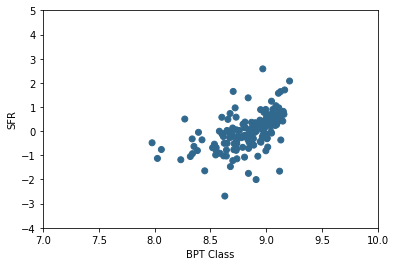

In [423]:
# Bad
fig, ax = plt.subplots()
ax.scatter(data["oh_p50"], data["sfr_tot_p50"], c=data["bptclass"])
ax.set_xlabel("BPT Class")
ax.set_ylabel("SFR")
ax.set_xlim(7,10)
ax.set_ylim(-4, 5)

# The huge dataset but like don't use this though

In [784]:
gal_metal = fits.getdata("/Users/kyleporter/Desktop/ASTR480/Final_Data/gal_fiboh_dr7_v5_2.fits")

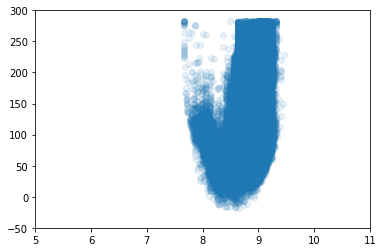

In [120]:
fig, ax = plt.subplots()
ax.scatter(gal_metal["median"], gal_metal["entropy"], alpha=0.1)
ax.set_xlim(5,11)
ax.set_ylim(-50,300)
plt.show()

# And this is larger

In [785]:
gal_all = fits.getdata("/Users/kyleporter/Desktop/ASTR480/Final_Data/gal_line_dr7_v5_2.fit")

# SQL Metals from Tremommy*

In [2]:
gal_o_n = pd.read_csv("/Users/kyleporter/Desktop/ASTR480/Final_Data/gal_spec_first_metals_real_sfr.csv")
gal_o_n.columns

Index(['specObjID', 'z', 'sfr_tot_p50', 'oh_p50', 'h_beta_flux',
       'oii_3726_flux', 'oii_3729_flux', 'oiii_4959_flux', 'oiii_4363_flux',
       'oiii_5007_flux', 'nii_6548_flux', 'nii_6584_flux', 'sii_6717_flux',
       'sii_6731_flux', 'oii_flux', 'oiii_flux', 'h_alpha_flux', 'bptclass',
       'lgm_tot_p50', 'specsfr_tot_p50'],
      dtype='object')

In [797]:
# Table "galspecextra" is the winner here...

### Potentially how to eliminate outliers (but H alpha has the largest sigma known to man)

In [798]:
H_Z = Table([gal_o_n["specObjID"], gal_o_n["z"], gal_o_n["h_alpha_flux"]], names=('ID', 'z', 'H'))

elements = np.array(gal_o_n["h_alpha_flux"])

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)
x = 0

for x in np.arange(1, len(H_Z["H"])):
    if (H_Z["H"][x] < mean - sd):
        H_Z["H"][x] = 0
        print(x)
    elif (H_Z["H"][x] > mean + sd):
        H_Z["H"][x] = 0
        print(x)
        

5342
5391
6231
7425


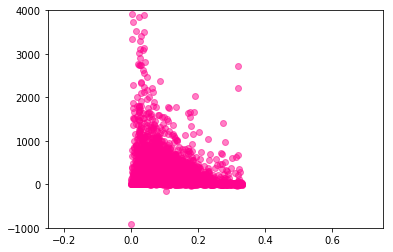

In [799]:
fig, ax = plt.subplots()
ax.scatter(H_Z["z"], H_Z["H"], alpha=0.5, c="xkcd:hot pink")
ax.set_xlim(-.25,0.75)
ax.set_ylim(-1000, 4000)
plt.show()

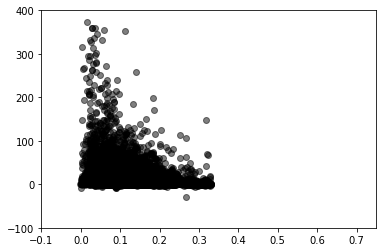

In [800]:
fig, ax = plt.subplots()
ax.scatter(gal_o_n["z"], gal_o_n["nii_6548_flux"], alpha=0.5, c='black')
ax.set_xlim(-.1,0.75)
ax.set_ylim(-100, 400)
plt.show()

### H alpha and Nii positively correlated? *Run fit curves

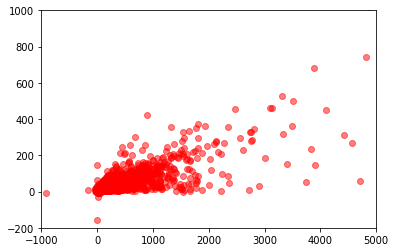

In [801]:
fig, ax = plt.subplots()
ax.scatter(gal_o_n["h_alpha_flux"], gal_o_n["nii_6548_flux"], alpha=0.5, c="red")
ax.set_xlim(-1000, 5000)
ax.set_ylim(-200, 1000)
plt.show()

### Same with Oii

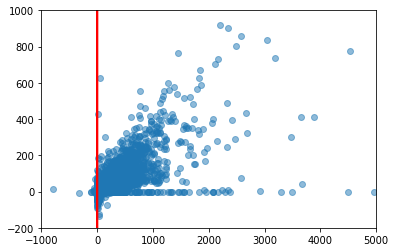

In [802]:

fig, ax = plt.subplots()
ax.scatter(gal_o_n_real_sfr["h_alpha_flux"], gal_o_n_real_sfr["oii_3726_flux"], alpha=0.5)
ax.plot(gal_o_n_real_sfr["h_alpha_flux"], my_yfit, c='red')
ax.set_xlim(-1000, 5000)
ax.set_ylim(-200, 1000)
plt.show()

### though both probably correlated with H alpha, not likely to be correlated with each other

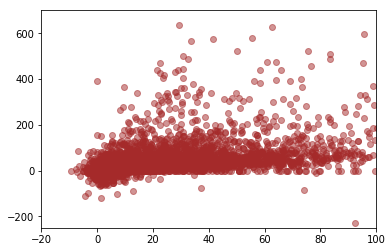

In [803]:
fig, ax = plt.subplots()
ax.scatter(gal_o_n["nii_6548_flux"], gal_o_n["oii_3726_flux"], alpha=0.5, c='brown')
ax.set_xlim(-20, 100)
ax.set_ylim(-250, 700)
plt.show()

### Higher SFR probably means higher of both of these

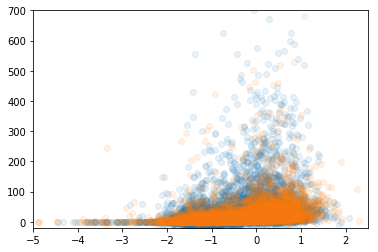

In [804]:
my_fit = np.polyfit(gal_o_n_real_sfr["sfr_tot_p50"],gal_o_n_real_sfr["oii_3726_flux"],2)
my_yfit = np.polyval(my_fit, gal_o_n_real_sfr["sfr_tot_p50"])

my_fit2 = np.polyfit(gal_o_n_real_sfr["sfr_tot_p50"],gal_o_n_real_sfr["nii_6548_flux"],2)
my_yfit2 = np.polyval(my_fit2, gal_o_n_real_sfr["sfr_tot_p50"])

fig, ax = plt.subplots()
plt.scatter(gal_o_n_real_sfr["sfr_tot_p50"], gal_o_n_real_sfr["oii_3726_flux"], alpha=0.1)
plt.scatter(gal_o_n["sfr_tot_p50"], gal_o_n["nii_6548_flux"], alpha=0.1)
plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit, c='red', linewidth=1)
plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linewidth=1)
ax.set_xlim(-5,2.5)
ax.set_ylim(-20, 700)
plt.show()

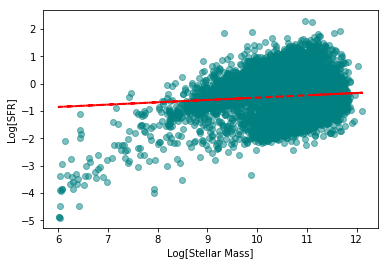

In [207]:
my_fit2 = np.polyfit(gal_o_n_real_sfr["lgm_tot_p50"],gal_o_n_real_sfr["sfr_tot_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_real_sfr["lgm_tot_p50"])

fig, ax = plt.subplots()
plt.scatter(gal_o_n_real_sfr["lgm_tot_p50"], gal_o_n_real_sfr["sfr_tot_p50"], alpha=0.5, label=None, c="teal")
plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linestyle="dashed", linewidth=2)

ax.set_xlabel("Log[Stellar Mass]")
ax.set_ylabel("Log[SFR]")
#ax.set_xlim(-0.05,0.5)
#ax.set_ylim(-1, 4)
plt.show()

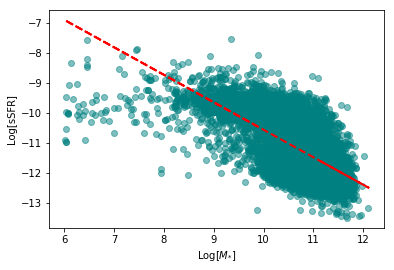

In [49]:
my_fit2 = np.polyfit(gal_o_n_real_sfr["lgm_tot_p50"],gal_o_n_real_sfr["specsfr_tot_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_real_sfr["lgm_tot_p50"])

fig, ax = plt.subplots()
plt.scatter(gal_o_n_real_sfr["lgm_tot_p50"], gal_o_n_real_sfr["specsfr_tot_p50"], alpha=0.5, label=None, 
            c='teal')
plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linestyle="dashed", linewidth=2)

ax.set_xlabel("Log[$M_{*}$]")
ax.set_ylabel("Log[sSFR]")
#ax.set_xlim(-0.05,0.5)
#ax.set_ylim(-1, 4)
plt.show()

No handles with labels found to put in legend.


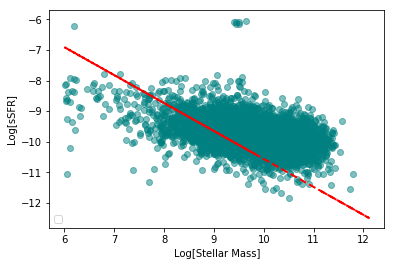

In [10]:
my_fit2 = np.polyfit(gal_o_n_real_sfr["lgm_tot_p50"],gal_o_n_real_sfr["specsfr_tot_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_real_sfr["lgm_tot_p50"])

fig, ax = plt.subplots()
plt.scatter(gal_o_n_OH["lgm_tot_p50"], gal_o_n_OH["specsfr_tot_p50"], alpha=0.5, label=None, 
            c='teal')
plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
ax.set_xlabel("Log[Stellar Mass]")
ax.set_ylabel("Log[sSFR]")
#ax.set_xlim(-0.05,0.5)
#ax.set_ylim(-1, 4)
plt.show()

No handles with labels found to put in legend.


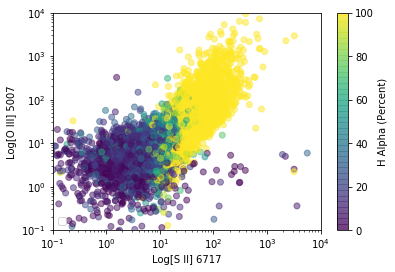

In [808]:

fig, ax = plt.subplots()
plt.scatter(gal_o_n_real_sfr["sii_6717_flux"], gal_o_n_real_sfr["oiii_5007_flux"], alpha=0.5, label=None, 
            c=gal_o_n_real_sfr['h_alpha_flux'])
#plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linewidth=1)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel("Log[S II] 6717")
ax.set_ylabel("Log[O III] 5007")
ax.set_xlim(0.1, 10000)
ax.set_ylim(0.1, 10000)
plt.show()

No handles with labels found to put in legend.


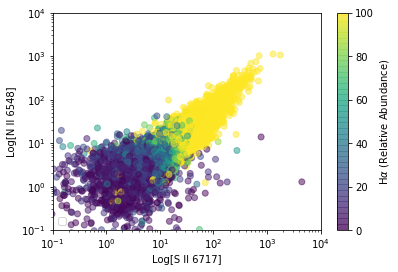

In [400]:
fig, ax = plt.subplots()
plt.scatter(gal_o_n_real_sfr["sii_6717_flux"], gal_o_n_real_sfr["nii_6548_flux"], alpha=0.5, label=None, 
            c=gal_o_n_real_sfr['h_alpha_flux'])
#plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linewidth=1)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H" r'$ \alpha $' " (Relative Abundance)")
plt.clim(0, 100)
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel("Log[S II 6717]")
ax.set_ylabel("Log[N II 6548]")
ax.set_xlim(0.1, 10000)
ax.set_ylim(0.1, 10000)
plt.show()

In [5]:
gal_o_n_real_sfr = pd.read_csv("/Users/kyleporter/Desktop/ASTR480/Final_Data/gal_spec_first_metals_real_sfr_old.csv")
gal_o_n_real_sfr.columns

Index(['specObjID', 'z', 'sfr_tot_p50', 'oh_p50', 'h_beta_flux',
       'oii_3726_flux', 'oii_3729_flux', 'oiii_4959_flux', 'oiii_4363_flux',
       'oiii_5007_flux', 'nii_6548_flux', 'nii_6584_flux', 'sii_6717_flux',
       'sii_6731_flux', 'oii_flux', 'oiii_flux', 'h_alpha_flux', 'bptclass',
       'lgm_tot_p50', 'specsfr_tot_p50'],
      dtype='object')

In [3]:
gal_o_n_OH = pd.read_csv("/Users/kyleporter/Desktop/ASTR480/Final_Data/gal_spec_first_metals_real_OH.csv")


No handles with labels found to put in legend.


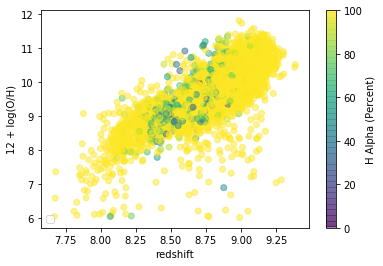

In [110]:
fig, ax = plt.subplots()
plt.scatter(gal_o_n_OH["oh_p50"], gal_o_n_OH["lgm_tot_p50"], alpha=0.5, label=None, 
            c=gal_o_n_OH['h_alpha_flux'])
#plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linewidth=1)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
ax.set_xlabel("redshift")
ax.set_ylabel("12 + log(O/H)")
#ax.set_ylim(19, 23)
plt.show()

No handles with labels found to put in legend.


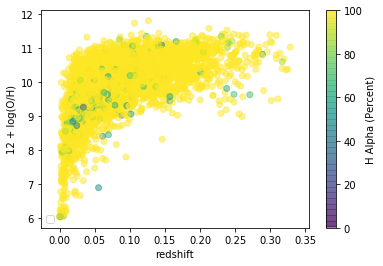

In [109]:
fig, ax = plt.subplots()
plt.scatter(gal_o_n_OH["z"], gal_o_n_OH["lgm_tot_p50"], alpha=0.5, label=None, 
            c=gal_o_n_OH['h_alpha_flux'])
#plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linewidth=1)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
ax.set_xlabel("redshift")
ax.set_ylabel("12 + log(O/H)")
#ax.set_ylim(19, 23)
plt.show()

No handles with labels found to put in legend.


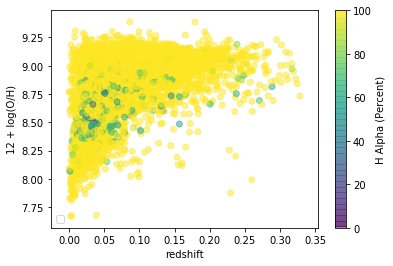

In [37]:
fig, ax = plt.subplots()
plt.scatter(gal_o_n_OH["z"], gal_o_n_OH["oh_p50"], alpha=0.5, label=None, 
            c=gal_o_n_OH['h_alpha_flux'])
#plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linewidth=1)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
ax.set_xlabel("redshift")
ax.set_ylabel("12 + log(O/H)")
#ax.set_ylim(19, 23)
plt.show()

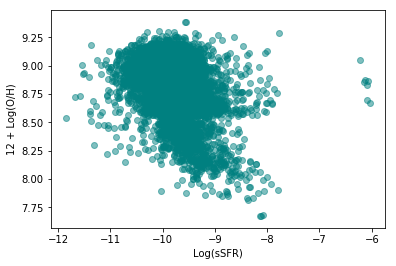

In [106]:
fig, ax = plt.subplots()

my_fit2 = np.polyfit(gal_o_n_OH["sfr_tot_p50"], gal_o_n_OH["oh_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_OH["sfr_tot_p50"])

plt.scatter(gal_o_n_OH["specsfr_tot_p50"], gal_o_n_OH["oh_p50"], alpha=0.5, label=None, 
            c='teal')
#plt.plot(gal_o_n_real_sfr["sfr_tot_p50"], my_yfit2, c='red', linewidth=1)

ax.set_xlabel("Log(sSFR)")
ax.set_ylabel("12 + Log(O/H)")
#ax.set_ylim(19, 23)
plt.show()

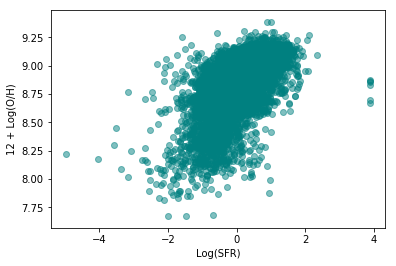

In [203]:
fig, ax = plt.subplots()

my_fit2 = np.polyfit(gal_o_n_OH["sfr_tot_p50"], gal_o_n_OH["oh_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_OH["sfr_tot_p50"])

plt.scatter(gal_o_n_OH["sfr_tot_p50"], gal_o_n_OH["oh_p50"], alpha=0.5, label=None, 
            c='teal')
#plt.plot(gal_o_n_real_sfr["sfr_tot_p50"], my_yfit2, c='red', linewidth=1)

ax.set_xlabel("Log(SFR)")
ax.set_ylabel("12 + Log(O/H)")
#ax.set_ylim(19, 23)
plt.show()

No handles with labels found to put in legend.


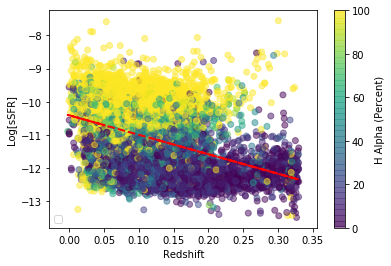

In [59]:
my_fit2 = np.polyfit(gal_o_n_real_sfr["z"],gal_o_n_real_sfr["specsfr_tot_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_real_sfr["z"])

fig, ax = plt.subplots()
plt.scatter(gal_o_n_real_sfr["z"], gal_o_n_real_sfr["specsfr_tot_p50"], alpha=0.5, label=None, 
            c=gal_o_n_real_sfr["h_alpha_flux"])
plt.plot(gal_o_n_real_sfr["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
ax.set_xlabel("Redshift")
ax.set_ylabel("Log[sSFR]")
#ax.set_xlim(-0.05,0.5)
#ax.set_ylim(-1, 4)
plt.show()

No handles with labels found to put in legend.


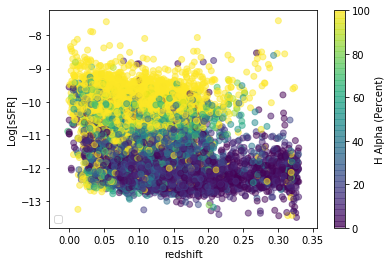

In [113]:
my_fit2 = np.polyfit(gal_o_n_real_sfr["z"],gal_o_n_real_sfr["specsfr_tot_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_real_sfr["z"])

fig, ax = plt.subplots()
plt.scatter(gal_o_n_real_sfr["z"], gal_o_n_real_sfr["specsfr_tot_p50"], alpha=0.5, label=None, 
            c=gal_o_n_real_sfr["h_alpha_flux"])
#plt.plot(gal_o_n_OH["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
ax.set_xlabel("redshift")
ax.set_ylabel("Log[sSFR]")
#ax.set_xlim(-0.05,0.5)
#ax.set_ylim(-1, 4)
plt.show()

No handles with labels found to put in legend.


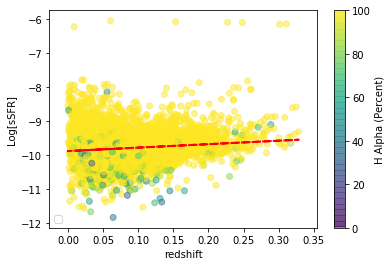

In [111]:
my_fit2 = np.polyfit(gal_o_n_OH["z"],gal_o_n_OH["specsfr_tot_p50"],1)
my_yfit2 = np.polyval(my_fit2, gal_o_n_OH["z"])

fig, ax = plt.subplots()
plt.scatter(gal_o_n_OH["z"], gal_o_n_OH["specsfr_tot_p50"], alpha=0.5, label=None, 
            c=gal_o_n_OH["h_alpha_flux"])
plt.plot(gal_o_n_OH["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
ax.set_xlabel("redshift")
ax.set_ylabel("Log[sSFR]")
#ax.set_xlim(-0.05,0.5)
#ax.set_ylim(-1, 4)
plt.show()

In [52]:
mask1 = (gal_o_n_real_sfr["lgm_tot_p50"] < 9)
mask2 = (gal_o_n_real_sfr["lgm_tot_p50"] < 9.5) & (gal_o_n_real_sfr["lgm_tot_p50"] > 9)
mask3 = (gal_o_n_real_sfr["lgm_tot_p50"] < 10) & (gal_o_n_real_sfr["lgm_tot_p50"] > 9.5)
mask4 = (gal_o_n_real_sfr["lgm_tot_p50"] < 10.5) & (gal_o_n_real_sfr["lgm_tot_p50"] > 10)
mask5 = (gal_o_n_real_sfr["lgm_tot_p50"] < 11) & (gal_o_n_real_sfr["lgm_tot_p50"] > 10.5)
mask6 = (gal_o_n_real_sfr["lgm_tot_p50"] > 11)

print(len(gal_o_n_real_sfr["lgm_tot_p50"][mask1]))
print(len(gal_o_n_real_sfr["lgm_tot_p50"][mask2]))
print(len(gal_o_n_real_sfr["lgm_tot_p50"][mask3]))
print(len(gal_o_n_real_sfr["lgm_tot_p50"][mask4]))
print(len(gal_o_n_real_sfr["lgm_tot_p50"][mask5]))
print(len(gal_o_n_real_sfr["lgm_tot_p50"][mask6]))
print()
print(np.mean(gal_o_n_real_sfr["z"][mask1]))
print(np.mean(gal_o_n_real_sfr["z"][mask2]))
print(np.mean(gal_o_n_real_sfr["z"][mask3]))
print(np.mean(gal_o_n_real_sfr["z"][mask4]))
print(np.mean(gal_o_n_real_sfr["z"][mask5]))
print(np.mean(gal_o_n_real_sfr["z"][mask6]))
print()
print(np.mean(gal_o_n_real_sfr["sfr_tot_p50"][mask1]))
print(np.mean(gal_o_n_real_sfr["sfr_tot_p50"][mask2]))
print(np.mean(gal_o_n_real_sfr["sfr_tot_p50"][mask3]))
print(np.mean(gal_o_n_real_sfr["sfr_tot_p50"][mask4]))
print(np.mean(gal_o_n_real_sfr["sfr_tot_p50"][mask5]))
print(np.mean(gal_o_n_real_sfr["sfr_tot_p50"][mask6]))
print()
print(np.mean(gal_o_n_real_sfr["specsfr_tot_p50"][mask1]))
print(np.mean(gal_o_n_real_sfr["specsfr_tot_p50"][mask2]))
print(np.mean(gal_o_n_real_sfr["specsfr_tot_p50"][mask3]))
print(np.mean(gal_o_n_real_sfr["specsfr_tot_p50"][mask4]))
print(np.mean(gal_o_n_real_sfr["specsfr_tot_p50"][mask5]))
print(np.mean(gal_o_n_real_sfr["specsfr_tot_p50"][mask6]))


OH9 = gal_o_n_real_sfr[mask1]
OH95 = gal_o_n_real_sfr[mask2]
OH10 = gal_o_n_real_sfr[mask3]
OH105 = gal_o_n_real_sfr[mask4]
OH11 = gal_o_n_real_sfr[mask5]
OH115 = gal_o_n_real_sfr[mask6]

350
454
939
1970
3363
2924

0.03177217589428571
0.04883265198237887
0.06632677384238549
0.08175914582741113
0.11125446595301795
0.17872830711354323

-1.3410590228571428
-0.4800470382643169
-0.19342014381342904
-0.3123593634472537
-0.4462390713689264
-0.5581460981978451

-9.657242554285713
-9.81701645154185
-10.033365275825348
-10.644530584771568
-11.256255147487371
-11.896416009233937


In [51]:
mask1 = (gal_o_n_OH["lgm_tot_p50"] < 9)
mask2 = (gal_o_n_OH["lgm_tot_p50"] < 9.5) & (gal_o_n_OH["lgm_tot_p50"] > 9)
mask3 = (gal_o_n_OH["lgm_tot_p50"] < 10) & (gal_o_n_OH["lgm_tot_p50"] > 9.5)
mask4 = (gal_o_n_OH["lgm_tot_p50"] < 10.5) & (gal_o_n_OH["lgm_tot_p50"] > 10)
mask5 = (gal_o_n_OH["lgm_tot_p50"] < 11) & (gal_o_n_OH["lgm_tot_p50"] > 10.5)
mask6 = (gal_o_n_OH["lgm_tot_p50"] > 11)

print(len(gal_o_n_OH["lgm_tot_p50"][mask1]))
print(len(gal_o_n_OH["lgm_tot_p50"][mask2]))
print(len(gal_o_n_OH["lgm_tot_p50"][mask3]))
print(len(gal_o_n_OH["lgm_tot_p50"][mask4]))
print(len(gal_o_n_OH["lgm_tot_p50"][mask5]))
print(len(gal_o_n_OH["lgm_tot_p50"][mask6]))
print()
print(np.mean(gal_o_n_OH["z"][mask1]))
print(np.mean(gal_o_n_OH["z"][mask2]))
print(np.mean(gal_o_n_OH["z"][mask3]))
print(np.mean(gal_o_n_OH["z"][mask4]))
print(np.mean(gal_o_n_OH["z"][mask5]))
print(np.mean(gal_o_n_OH["z"][mask6]))
print()
print(np.mean(gal_o_n_OH["sfr_tot_p50"][mask1]))
print(np.mean(gal_o_n_OH["sfr_tot_p50"][mask2]))
print(np.mean(gal_o_n_OH["sfr_tot_p50"][mask3]))
print(np.mean(gal_o_n_OH["sfr_tot_p50"][mask4]))
print(np.mean(gal_o_n_OH["sfr_tot_p50"][mask5]))
print(np.mean(gal_o_n_OH["sfr_tot_p50"][mask6]))
print()
print(np.mean(gal_o_n_OH["specsfr_tot_p50"][mask1]))
print(np.mean(gal_o_n_OH["specsfr_tot_p50"][mask2]))
print(np.mean(gal_o_n_OH["specsfr_tot_p50"][mask3]))
print(np.mean(gal_o_n_OH["specsfr_tot_p50"][mask4]))
print(np.mean(gal_o_n_OH["specsfr_tot_p50"][mask5]))
print(np.mean(gal_o_n_OH["specsfr_tot_p50"][mask6]))
print()
print(np.mean(gal_o_n_OH["oh_p50"][mask1]))
print(np.mean(gal_o_n_OH["oh_p50"][mask2]))
print(np.mean(gal_o_n_OH["oh_p50"][mask3]))
print(np.mean(gal_o_n_OH["oh_p50"][mask4]))
print(np.mean(gal_o_n_OH["oh_p50"][mask5]))
print(np.mean(gal_o_n_OH["oh_p50"][mask6]))

OH9 = gal_o_n_OH[mask1]
OH95 = gal_o_n_OH[mask2]
OH10 = gal_o_n_OH[mask3]
OH105 = gal_o_n_OH[mask4]
OH11 = gal_o_n_OH[mask5]
OH115 = gal_o_n_OH[mask6]

965
1482
2728
3093
1527
205

0.025839038135440414
0.04754333211201075
0.06714850308394435
0.09071061211703828
0.11871478847413222
0.1621990195121951

-0.9072265799523316
-0.3149147985809721
0.02767551598778958
0.37789993929382537
0.7853671880019644
1.1368052878048782

-9.426872725388604
-9.656824418353551
-9.79283560227272
-9.912751763013247
-9.962501178127052
-10.050884107317074

8.436554097409333
8.676410678137668
8.86251173607039
8.997559664403495
9.062569106090375
9.070083434146348


No handles with labels found to put in legend.


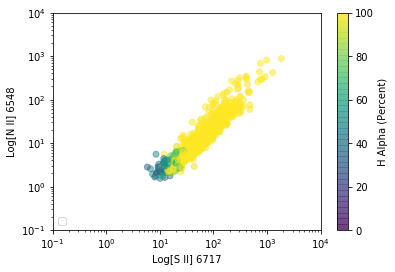

In [66]:
fig, ax = plt.subplots()
plt.scatter(OH9["sii_6717_flux"], OH9["nii_6548_flux"], alpha=0.5, label=None, 
            c=OH9['h_alpha_flux'])
#plt.plot(gal_o_n_real_sfr["lgm_tot_p50"], my_yfit2, c='red', linewidth=1)
plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="H Alpha (Percent)")
plt.clim(0, 100)
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel("Log[S II] 6717")
ax.set_ylabel("Log[N II] 6548")
ax.set_xlim(0.1, 10000)
ax.set_ylim(0.1, 10000)
plt.show()

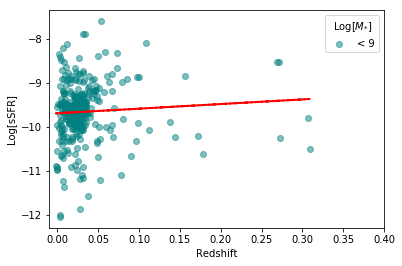

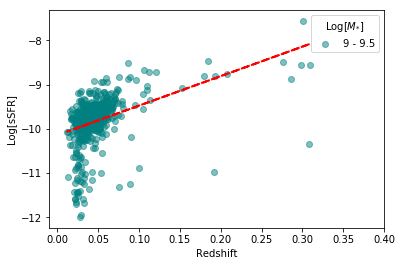

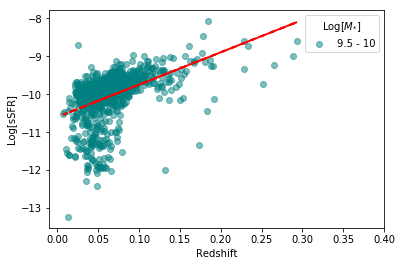

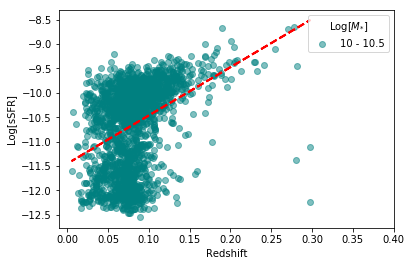

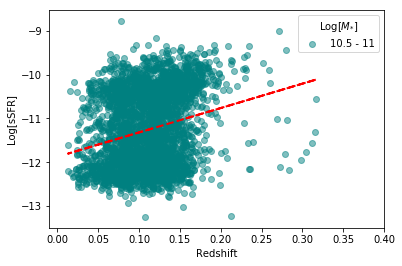

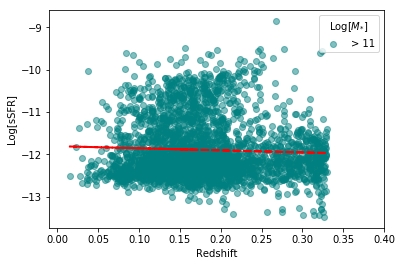

In [36]:
masses = [9, 95, 10, 105, 11, 115]
mass_names = ['< 9', '9 - 9.5', '9.5 - 10', '10 - 10.5', '10.5 - 11', '> 11']

for i in masses:
    name = vars()['OH'+str(i)]
    my_fit2 = np.polyfit(name["z"],name["specsfr_tot_p50"],1)
    my_yfit2 = np.polyval(my_fit2, name["z"])

    fig, ax = plt.subplots()
    yes = plt.scatter(name["z"], name["specsfr_tot_p50"], alpha=0.5, label=mass_names.pop(0), 
                c='teal')
    plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
    plt.legend(title="Log[$M_{*}$]", loc=1)
    ax.set_xlabel("Redshift")
    ax.set_ylabel("Log[sSFR]")
    ax.set_xlim(-0.01,0.4)
    #ax.set_ylim(-1, 4)
    plt.show()


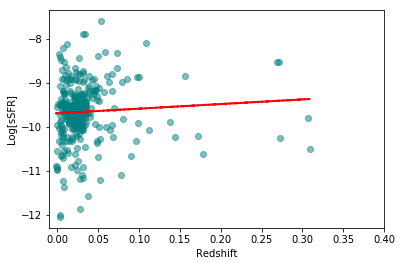

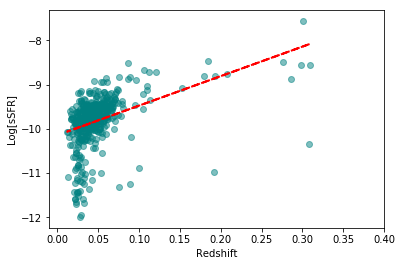

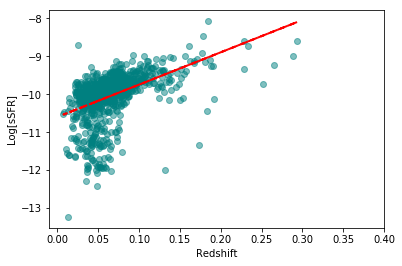

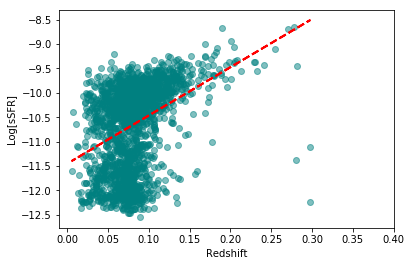

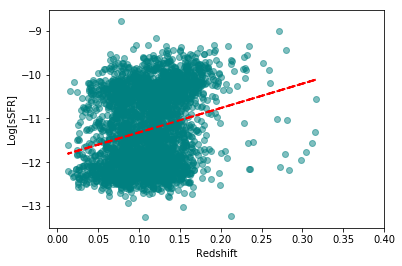

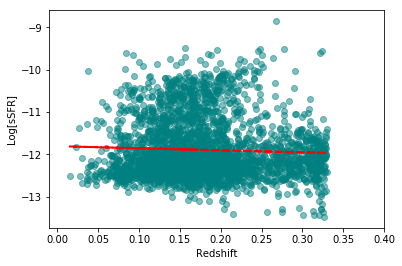

In [23]:
masses = [9, 95, 10, 105, 11, 115]
for i in masses:
    fig, ax = plt.subplots()
    name = vars()['OH'+str(i)]
    my_fit2 = np.polyfit(name["z"],name["specsfr_tot_p50"],1)
    my_yfit2 = np.polyval(my_fit2, name["z"])

    plt.scatter(name["z"], name["specsfr_tot_p50"], alpha=0.5, label=None, 
                c='teal')
    plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
    ax.set_xlabel("Redshift")
    ax.set_ylabel("Log[sSFR]")
    ax.set_xlim(-0.01,0.4)
    #ax.set_ylim(-1, 4)
    plt.show()


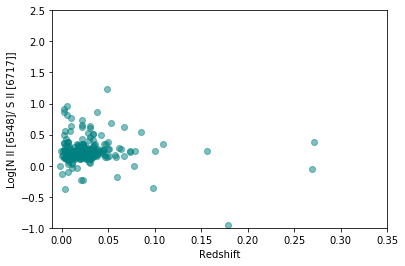

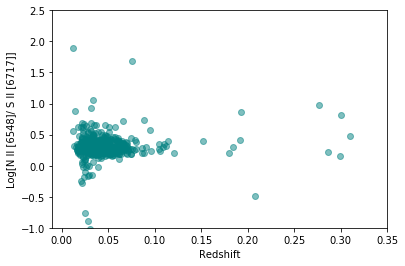

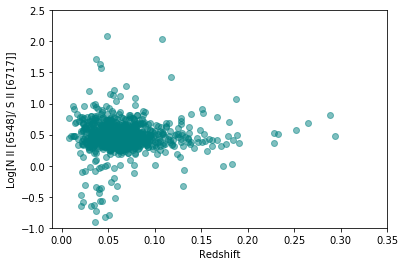

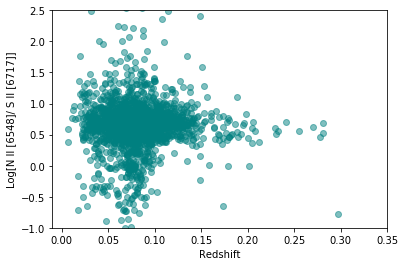

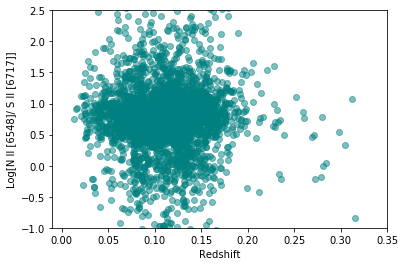

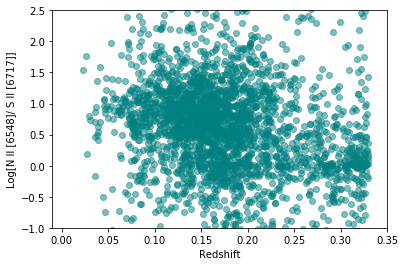

In [214]:
masses = [9, 95, 10, 105, 11, 115]

for i in masses:
    name = vars()['OH'+str(i)]
    fig, ax = plt.subplots()
    plt.scatter(name["z"], name["nii_6548_flux"] / name["sii_6717_flux"], alpha=0.5, label=None, 
                c='teal')

    #plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)

    ax.set_xlabel("Redshift")
    ax.set_ylabel("Log[N II [6548]/ S II [6717]]")
    ax.set_xlim(-0.01,0.35)
    ax.set_ylim(-1, 2.5)
plt.show()


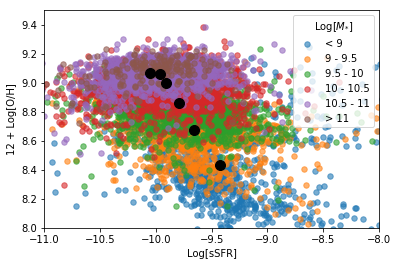

In [40]:
masses = [9, 95, 10, 105, 11, 115]
mass_names = ['< 9', '9 - 9.5', '9.5 - 10', '10 - 10.5', '10.5 - 11', '> 11']
fig, ax = plt.subplots()
mean_ssfr = []
mean_OH = []
for i in masses:
    name = vars()['OH'+str(i)]
    mean_ssfr.append(np.mean(name["specsfr_tot_p50"]))
    mean_OH.append(np.mean(name["oh_p50"]))
    #print(mean_OH)
    plt.scatter(name["specsfr_tot_p50"], name["oh_p50"], alpha=0.6, label=mass_names.pop(0), s=30)
    #plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)

    ax.set_xlabel("Log[sSFR]")
    ax.set_ylabel("12 + Log[O/H]")
    ax.set_xlim(-11, -8)
    ax.set_ylim(8, 9.5)

plt.scatter(mean_ssfr, mean_OH, c='black', s=100)
plt.legend(title="Log[$M_{*}$]")
plt.show()


In [194]:
mass_names = mass_names[]

In [198]:
mass_names = ['< 9', '9 - 9.5', '9.5 - 10', '10 - 10.5', '10.5 - 11', '> 11']


In [271]:
x_masked = ma.masked_outside(name["nii_6548_flux"] / name["h_alpha_flux"], , 0.3, copy=True)
#y_masked = ma.masked_inside(name["nii_6548_flux"] / name["sii_6717_flux"], -2, 3, copy=False)
print(np.min(x_masked))


nan


/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2178: RuntimeWarning: invalid value encountered in less
  condition = (xf < v1) | (xf > v2)
/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2178: RuntimeWarning: invalid value encountered in greater
  condition = (xf < v1) | (xf > v2)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


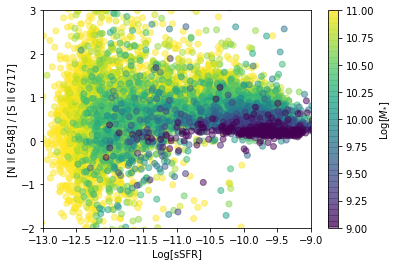

In [43]:
masses = [9, 95, 10, 105, 11, 115]
masses = masses[::-1]
for i in masses:
    name = vars()['OH'+str(i)]
    plt.scatter(name["specsfr_tot_p50"], name["nii_6548_flux"] / name["sii_6717_flux"], alpha=0.5, label=None, 
                c=name["lgm_tot_p50"])

    #plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
    plt.xlabel("Log[sSFR]")
    plt.ylabel("[N II 6548] / [S II 6717]")
    plt.xlim(-13, -9)
    plt.ylim(-2, 3)
    plt.clim(9, 11)
plt.colorbar(label="Log[$M_{*}$]")
plt.show()


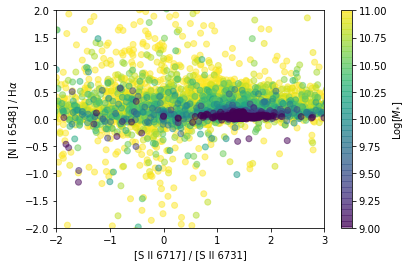

In [44]:
masses = [9, 95, 10, 105, 11, 115]
masses = masses[::-1]
fig, ax = plt.subplots()
for i in masses:
    name = vars()['OH'+str(i)]
    plt.scatter(name["sii_6717_flux"] / name["sii_6731_flux"], name["nii_6548_flux"] / name["h_alpha_flux"], alpha=0.5, label=None, 
                c=name["lgm_tot_p50"])

    #plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
    plt.clim(9, 11)
    ax.set_ylabel("[N II 6548] / H"r'$ \alpha $')
    ax.set_xlabel("[S II 6717] / [S II 6731]")
    ax.set_ylim(-2, 2)
    ax.set_xlim(-2, 3)
plt.colorbar(label="Log[$M_{*}$]")

plt.show()


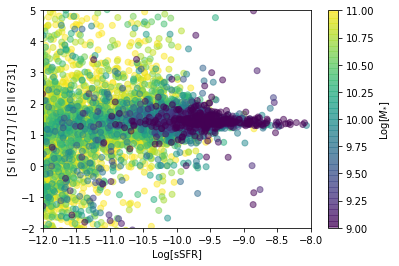

In [45]:
masses = [9, 95, 10, 105, 11, 115]
masses = masses[::-1]
fig, ax = plt.subplots()
for i in masses:
    name = vars()['OH'+str(i)]
    plt.scatter(name["specsfr_tot_p50"], name["sii_6717_flux"] / name["sii_6731_flux"], alpha=0.5, label=None, 
                c=name["lgm_tot_p50"])

    #plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
    ax.set_xlabel("Log[sSFR]")
    ax.set_ylabel("[S II 6717] / [S II 6731]")
    ax.set_xlim(-12, -8)
    ax.set_ylim(-2, 5)
    plt.clim(9, 11)
plt.colorbar(label="Log[$M_{*}$]")
plt.show()

# SURFACE LEVEL: sSFR decreases with mass. 

# DEEPER: Average density maybe goes down with more mass and less sSFR. Could be significant if we say that higher
## mass means larger gravity potential well, so gasses never escape. 

# DEEPERR: Would expect less variation with higher galaxy mass, as the potential well is so large. I propose this
## is due to sampling error, where lower mass galaxies are more homogeneous in these properties because there 
## is a bias against sampling less bright objects. It is likely that only the brightest galaxies are recorded here.
## However, that potentially implies that the objects are also the most star-forming, which would indicate they
## have more dynamic operations in place than less bright objects, suggesting they should actually have more
## variation in their emission lines (galactic winds throwing out metal-rich gasses, for example).

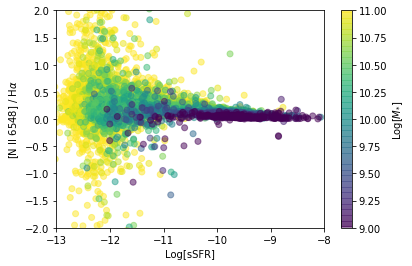

In [46]:
masses = [9, 95, 10, 105, 11, 115]
masses = masses[::-1]
fig, ax = plt.subplots()
for i in masses:
    name = vars()['OH'+str(i)]
    plt.scatter(name["specsfr_tot_p50"], name["nii_6548_flux"] / name["h_alpha_flux"], alpha=0.5, label=None, 
                c=name["lgm_tot_p50"])

    #plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
    ax.set_xlabel("Log[sSFR]")
    ax.set_ylabel("[N II 6548] / H"r'$ \alpha $')
    ax.set_xlim(-13, -8)
    ax.set_ylim(-2, 2)
    plt.clim(9, 11)
plt.colorbar(label="Log[$M_{*}$]")

plt.show()


In [ ]:
#SURFACE LEVEL: sSFR changes with mass (decreases).

#DEEPER: higher mass galaxies we see a higher variation in NII at lower SFR because higher mass galaxies were 
# sampled because they are brighter, but they have less sfr. However, still possible it is significant. If NII is a
# temperature tracer, then we are seeing higher variation in temeprature in these high mass galaxies (same mean tho). 

#lower mass galaxies sampled because they have more brightness (starburst)


In [376]:
masses

[115, 11, 105, 10, 95, 9]

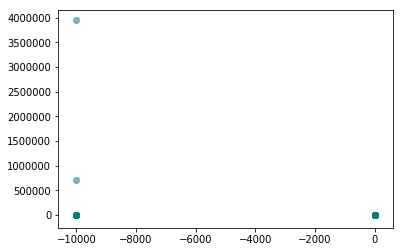

In [17]:
masses = [9, 95, 10, 105, 11, 115]

for i in masses:
    name = vars()['OH'+str(i)]
    plt.scatter(name["oh_p50"], name["nii_6548_flux"] / name["sii_6717_flux"], alpha=0.5, label=None, 
                c='teal')

    #plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)

    ax.set_xlabel("12 + Log[O/H]")
    ax.set_ylabel("[N II 6548] / [S II 6717]")
    ax.set_xlim(8, 10)
    ax.set_ylim(-2, 3)
plt.show()

# Here we see mass and metallicity through oxygen abundance being highly related. Each higher mass bin shifts the 
## metallicity to be higher. But more interestingly, there is a specific upturn on this line ratio at 12 + logOH = 9.
## This implies there is some process that makes this happen!! However this sample is biased, so we can't be sure. 
## Still, it is possible this line ratio shows a ratio between galaxy temperature and gas mass density. This may then
## potentially show that there is a specific process that activates at 12 + logOH = 9 where gas temperature 
## increases greatly compared to the gas mass density of the galaxy. Potentially there is a point
## in galaxy formation history where gas stops being deposited into the intergalactic medium due to galactic
## winds and insteadit is trapped inside, making the temperature rise rapidly. The flaw in this logic
## is that gas mass density is still increasing here, so temperature must be increasing at a high rate. 

No handles with labels found to put in legend.


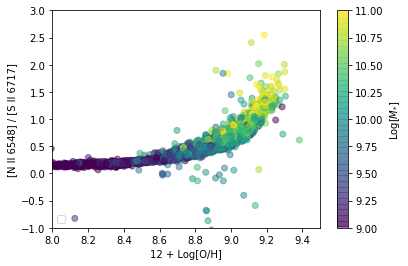

In [47]:
fig, ax = plt.subplots()
plt.scatter(gal_o_n_OH["oh_p50"], gal_o_n_OH["nii_6548_flux"] / gal_o_n_OH["sii_6717_flux"], alpha=0.5, label=None, 
            c=gal_o_n_OH["lgm_tot_p50"])

plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.colorbar(label="Log[$M_{*}$]")
plt.clim(9, 11)

ax.set_xlabel("12 + Log[O/H]")
ax.set_ylabel("[N II 6548] / [S II 6717]")
ax.set_xlim(8, 9.5)
ax.set_ylim(-1, 3)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


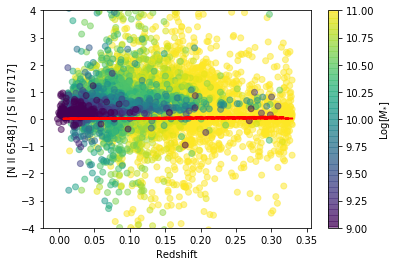

In [48]:
masses = [9, 95, 10, 105, 11, 115]
masses = masses[::-1]
fig, ax = plt.subplots()
for i in masses:
    name = vars()['OH'+str(i)]
    my_fit2 = np.polyfit(name["z"], name["nii_6548_flux"] / name["sii_6717_flux"],1)
    my_yfit2 = np.polyval(my_fit2, name["z"])
    plt.scatter(name["z"], name["nii_6548_flux"] / name["sii_6717_flux"], alpha=0.5, label=None, 
                c=name["lgm_tot_p50"])

    plt.plot(name["z"], my_yfit2, c='red', linestyle="dashed", linewidth=2)
    ax.set_xlabel("Redshift")
    ax.set_ylabel("[N II 6548] / [S II 6717]")
    #ax.set_xlim(-13, -8)
    ax.set_ylim(-4, 4)
    plt.clim(9, 11)
plt.colorbar(label="Log[$M_{*}$]")

plt.show()
